# EDA (Exploratory Data Analysis)

- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Steps involved in EDA**
1. Describing the data
2. Data cleaning
3. Imputation techniques
4. Data analysis and visualization
5. Transformations
6. Auto EDA

**Import data and data description**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data_clean.csv', index_col=0)
df

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [4]:
df.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [5]:
df.shape

(158, 9)

In [6]:
df.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


- As we can see that,
- 'Month' and 'Temp c' columns have all the numeric data still python has shown us that it is object.
- We will have to find out the reason and change the data type of these 2 columns.

# **Data type conversion**

In [8]:
df['Temp C'].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [9]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

**There are 2 ways by which we can convert the data type of these 2 columns**
- By using replace method.
- By using pandas built in functions.

In [ ]:
#Replace method

In [12]:
df['Month'].replace('May',5, inplace=True)

In [13]:
df['Month'].unique()

array(['5', 5, '6', '7', '8', '9'], dtype=object)

In [14]:
df['Month'].dtype

dtype('O')

In [17]:
df['Month'] = df['Month'].astype(int)

In [18]:
df['Month'].dtype

dtype('int32')

In [ ]:
#Using pandas built in functions

In [19]:
df['Temp C'].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [21]:
df['Temp C'] = pd.to_numeric(df['Temp C'], errors='coerce')

In [22]:
df['Temp C'].unique()

array([67., 72., 74., 62., 56., 66., 65., 59., 61., 69., nan, 68., 58.,
       64., 57., 73., 81., 79., 76., 78., 84., 85., 82., 87., 90., 93.,
       92., 80., 77., 75., 83., 88., 89., 91., 86., 97., 94., 96., 71.,
       63., 70.])

# Duplicates

In [23]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [24]:
df.duplicated().sum()

1

In [ ]:
#Print the duplicated values

In [25]:
df[df.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9,28,2010,75,S


In [ ]:
#Get all the duplicate values.
#2 Approaches

In [26]:
df[(df['Ozone'] == 14.0) & (df['Temp C']== 75.0)]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
151,14.0,191.0,14.3,75.0,9,28,2010,75,S
157,14.0,191.0,14.3,75.0,9,28,2010,75,S


In [28]:
df[df.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
151,14.0,191.0,14.3,75.0,9,28,2010,75,S
157,14.0,191.0,14.3,75.0,9,28,2010,75,S


In [ ]:
#Drop Duplicated records

In [29]:
df.drop_duplicates()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5,1,2010,67,S
2,36.0,118.0,8.0,72.0,5,2,2010,72,C
3,12.0,149.0,12.6,74.0,5,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5,4,2010,62,S
5,NaN,NaN,14.3,56.0,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,68.0,9,30,2010,68,S
154,41.0,190.0,7.4,67.0,5,1,2010,67,C
155,30.0,193.0,6.9,70.0,9,26,2010,70,PS
156,NaN,145.0,13.2,77.0,9,27,2010,77,S


In [30]:
df.duplicated().sum()

1

In [31]:
df.drop_duplicates(inplace=True)
df.shape

(157, 9)

# Drop columns

- There is one column which only has single different value.
- We need to get rid of all the uneccesary columns or else it will be very complex data.

In [32]:
df.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5,1,2010,67,S
2,36.0,118.0,8.0,72.0,5,2,2010,72,C
3,12.0,149.0,12.6,74.0,5,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5,4,2010,62,S
5,NaN,NaN,14.3,56.0,5,5,2010,56,S


In [35]:
df.drop(columns=['Temp C', 'Year'], inplace=True)

In [36]:
df

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


# Rename the columns

In [38]:
df.rename(columns= {'Solar.R':'Solar'}, inplace=True)

In [39]:
df

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


# Missing value imputation

- In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.
- If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crucial step in EDA.
- Missing values can appear for several reasons like:
    - Incomplete data entry
    - Issues with machines
    - Improper handling of data
    - And many more.
         

In [ ]:
#Checking null values

In [40]:
df.isna()

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,True,False,False,False,False,False,False


In [41]:
df.isna().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

In [ ]:
#Visualizing missing values

In [42]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

<AxesSubplot:>

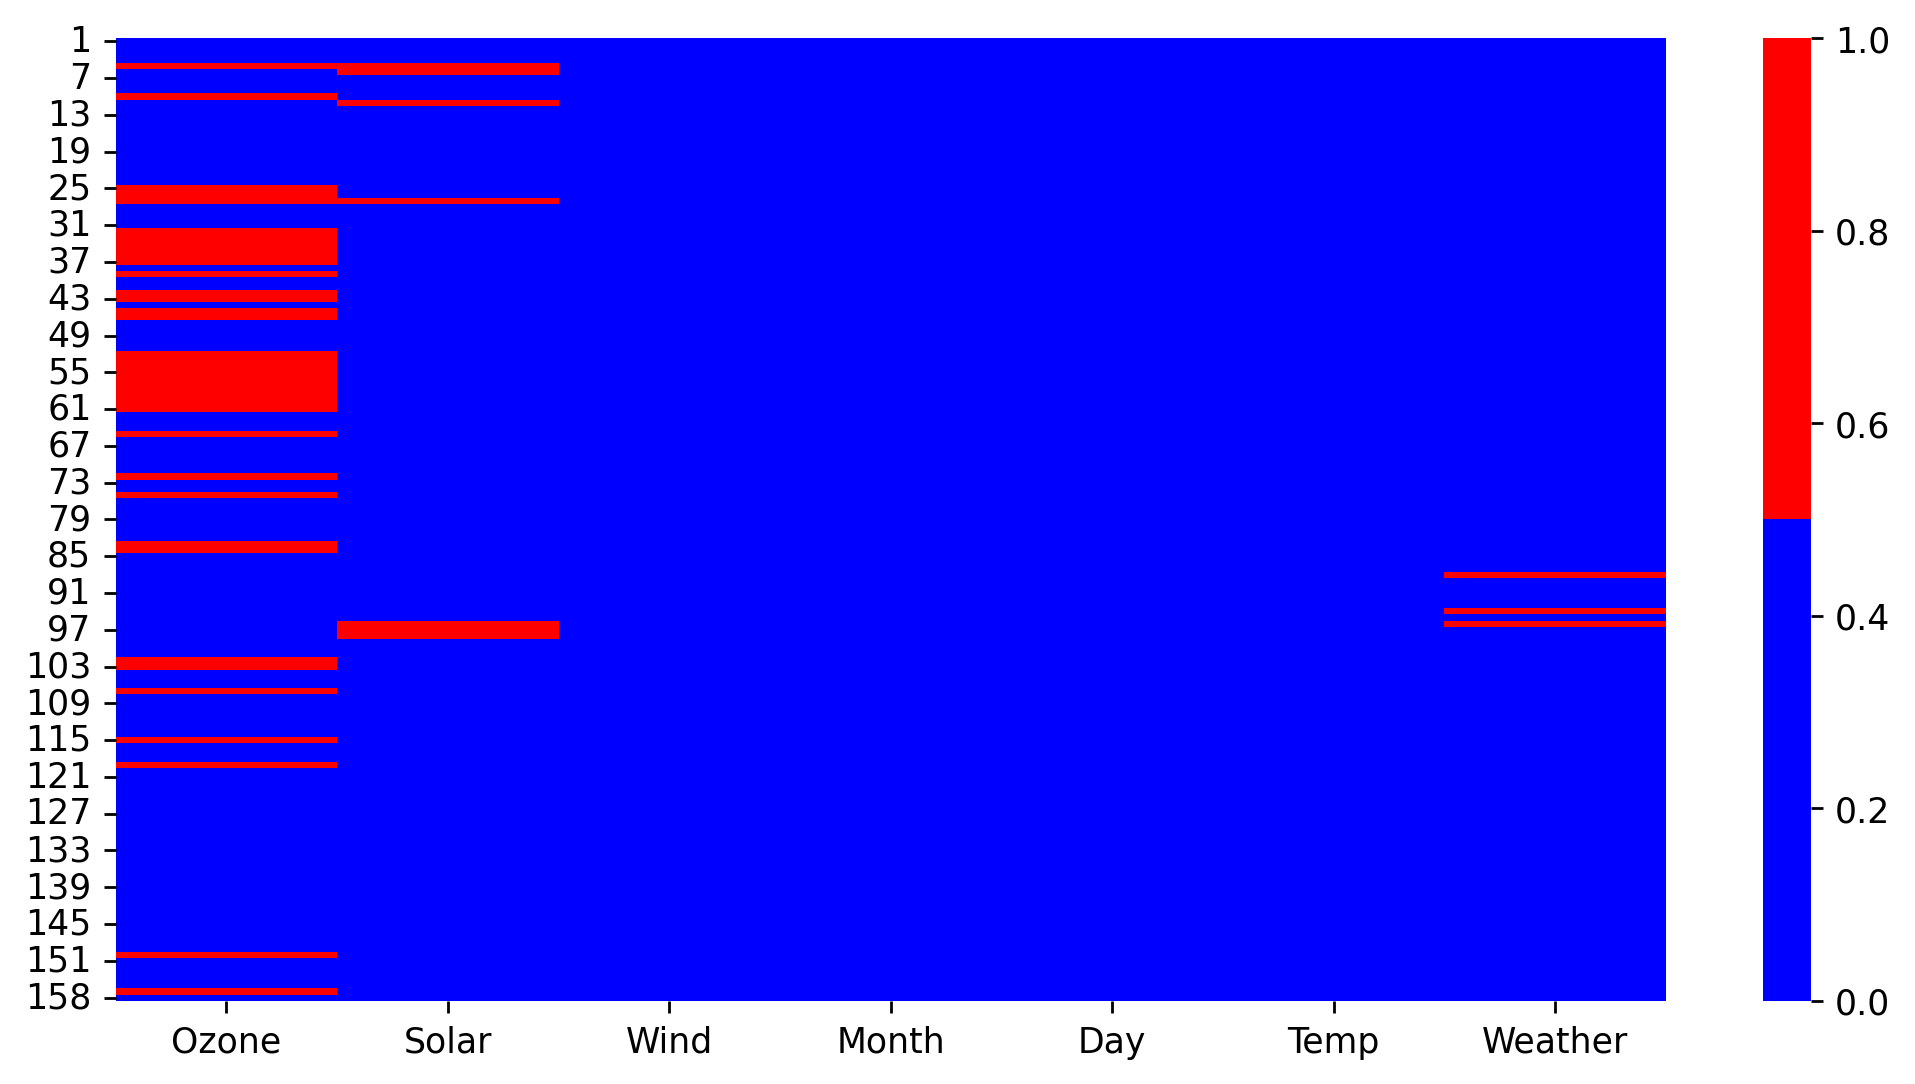

In [44]:
sns.heatmap(df.isnull(), cmap=['blue','red'])

# Rules for missing value imputation:


- If missing values are 1 to 3%, drop the records.
- If missing values are between 5 to 40%, fill missing values.
- If missings values are more than 50%, drop the column.

In [45]:
#Calculate the percentage of missig values in each column.
df.isna().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

In [49]:
for i in df.isna().sum():
    print(f"Missing value % is: {i/len(df)*100}")

Missing value % is: 24.203821656050955
Missing value % is: 4.45859872611465
Missing value % is: 0.0
Missing value % is: 0.0
Missing value % is: 0.0
Missing value % is: 0.0
Missing value % is: 1.910828025477707


In [50]:
for i in df.isnull().sum():
    print('Missing Values % is: ', i/len(df)*100)

Missing Values % is:  24.203821656050955
Missing Values % is:  4.45859872611465
Missing Values % is:  0.0
Missing Values % is:  0.0
Missing Values % is:  0.0
Missing Values % is:  0.0
Missing Values % is:  1.910828025477707


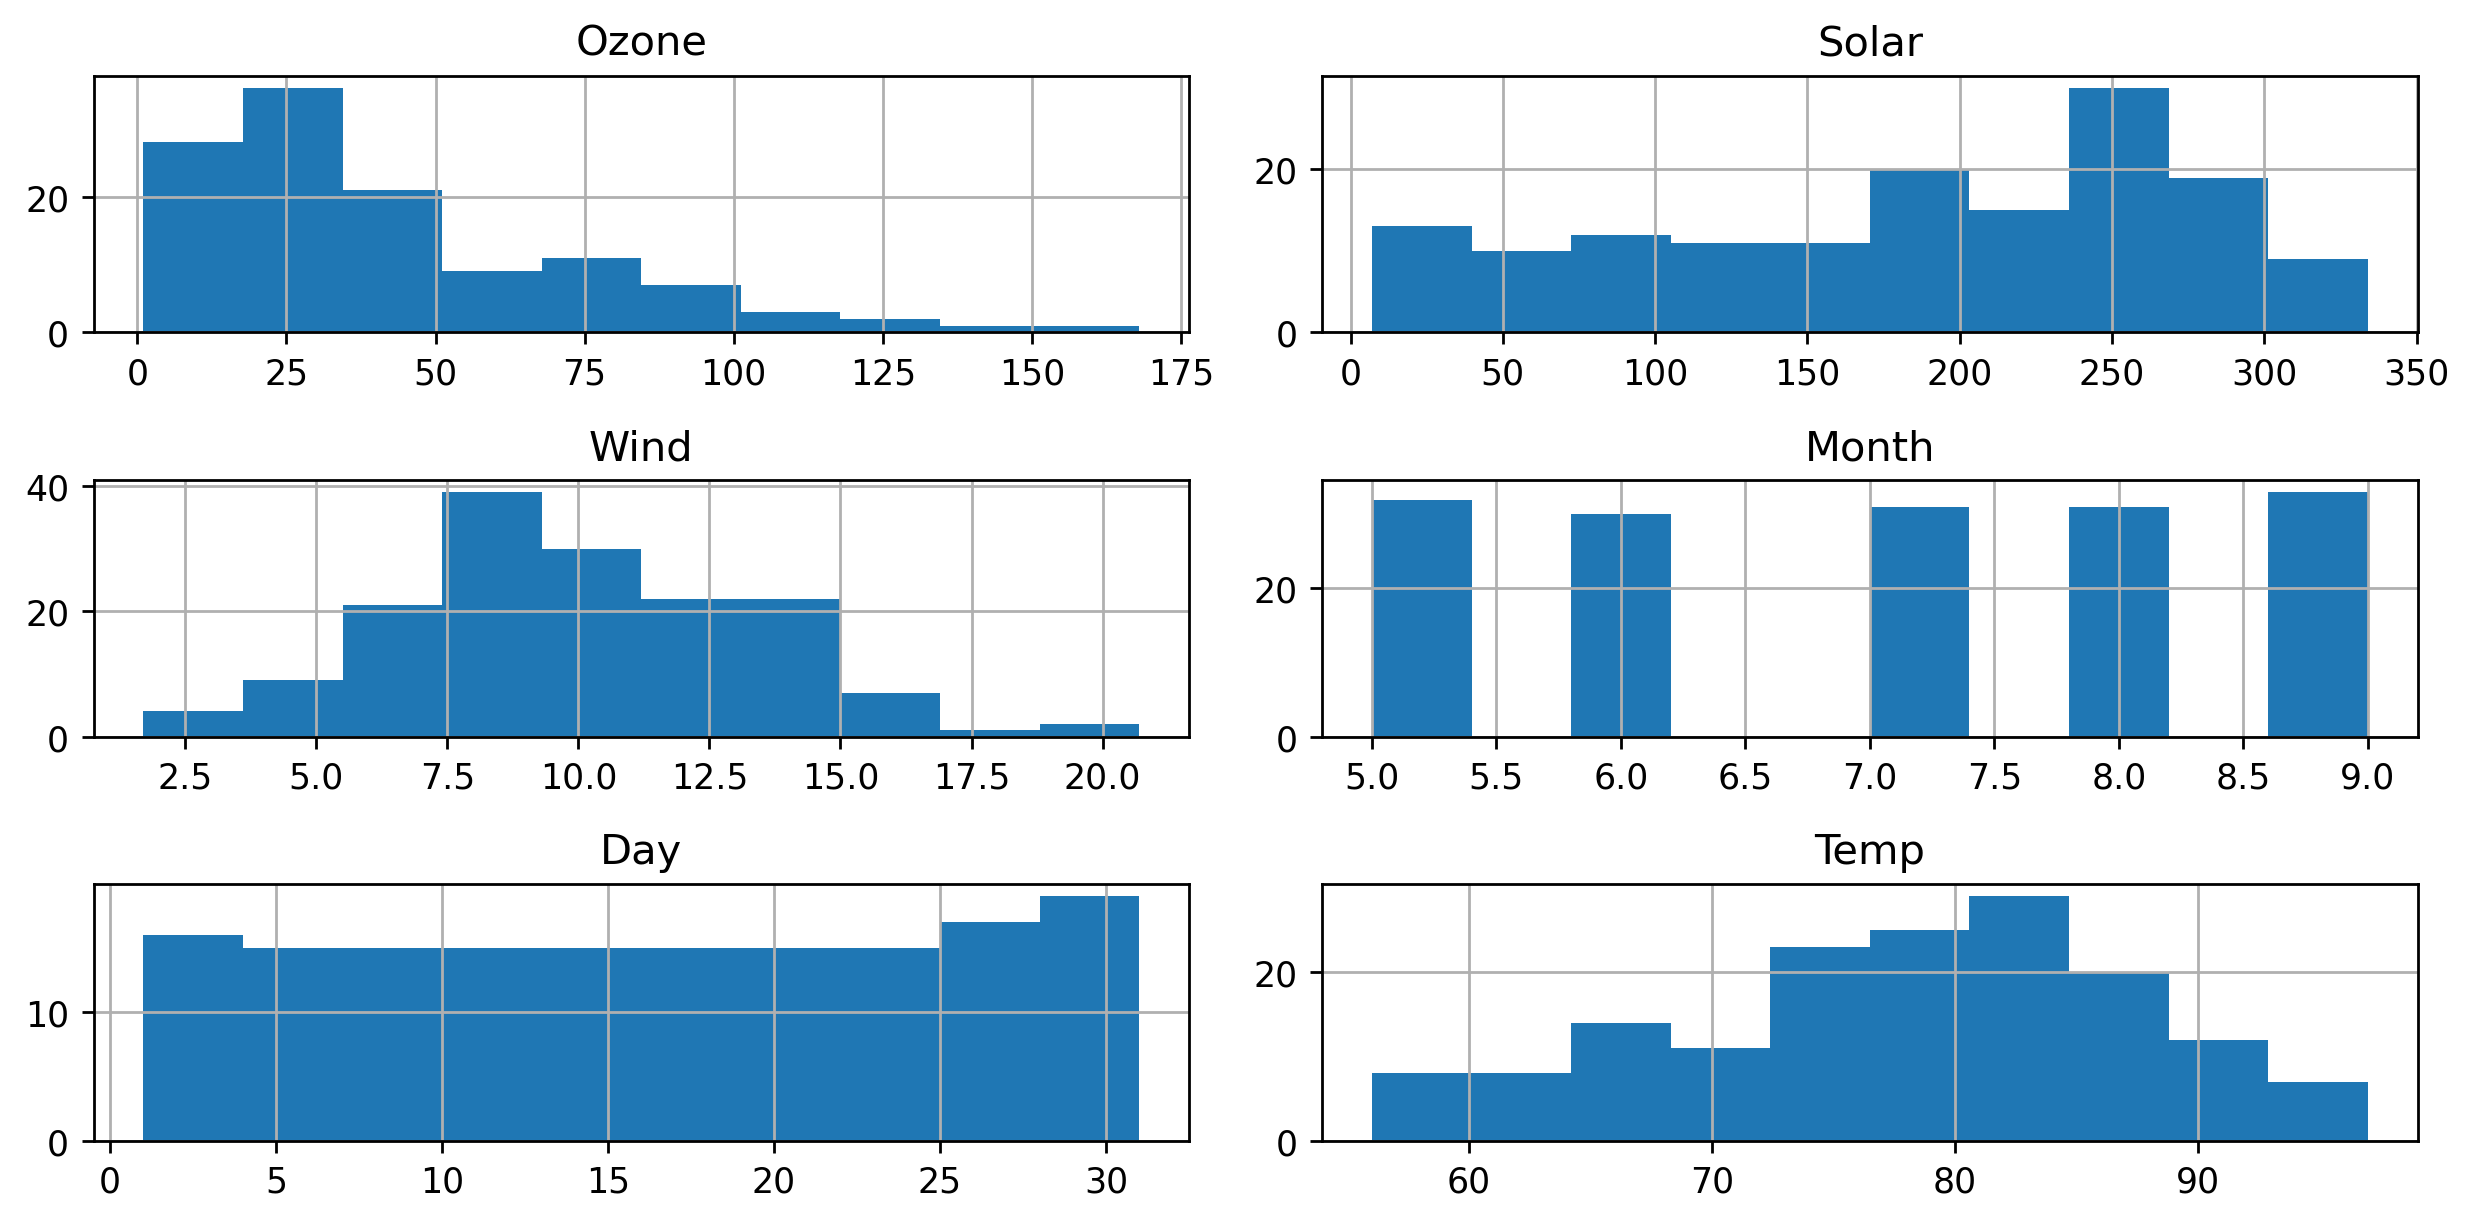

In [60]:
df.hist()

plt.tight_layout()
plt.show()

In [53]:
df['Ozone'].skew()

1.2720131447501268

In [54]:
df['Solar'].skew()

-0.4141167126969295

In [57]:
df['Weather'].mode()

0    S
Name: Weather, dtype: object

In [58]:
df['Weather'].unique()

array(['S', 'C', 'PS', nan], dtype=object)

In [62]:
ozone_median = df['Ozone'].median()
ozone_median

31.0

In [63]:
df['Ozone'].fillna(ozone_median, inplace=True)

In [64]:
df['Solar'].fillna(df['Solar'].mean(), inplace=True)

In [69]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

In [70]:
df['Weather'].isna().sum()

0

In [71]:
for i in df.isna().sum():
    print(f"Missing value % is: {i/len(df)*100}")

Missing value % is: 0.0
Missing value % is: 0.0
Missing value % is: 0.0
Missing value % is: 0.0
Missing value % is: 0.0
Missing value % is: 0.0
Missing value % is: 0.0


# Outlier detection

- There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [72]:
df.describe()

,Ozone,Solar,Wind,Month,Day,Temp
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,39.197452,185.366667,9.929936,7.019108,15.929936,77.745223
std,28.781992,86.998999,3.505188,1.434338,8.974404,9.405334
min,1.000000,7.000000,1.700000,5.000000,1.000000,56.000000
25%,21.000000,127.000000,7.400000,6.000000,8.000000,72.000000
50%,31.000000,193.000000,9.700000,7.000000,16.000000,79.000000
75%,45.000000,255.000000,11.500000,8.000000,24.000000,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,97.000000


<AxesSubplot:>

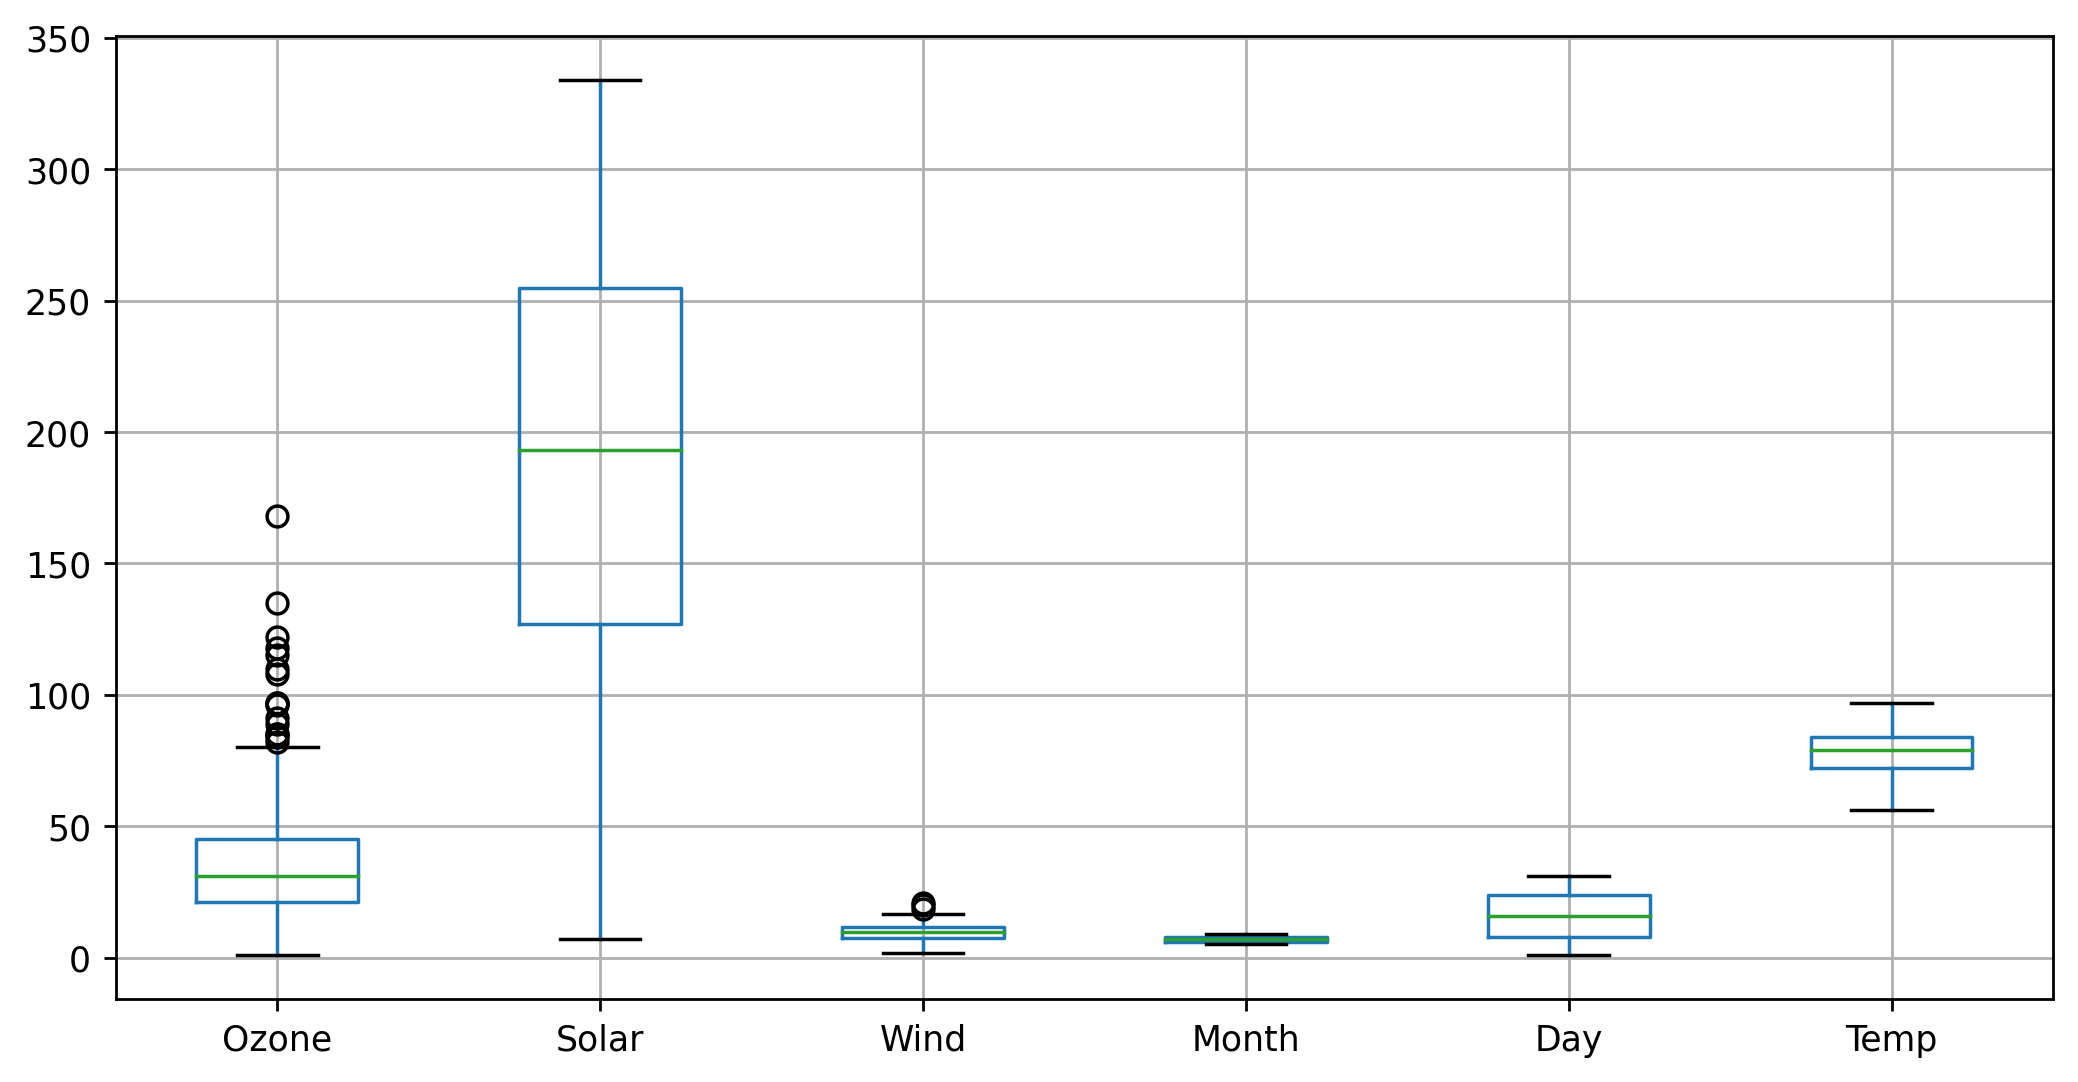

In [73]:
df.boxplot()

<AxesSubplot:xlabel='Month', ylabel='Ozone'>

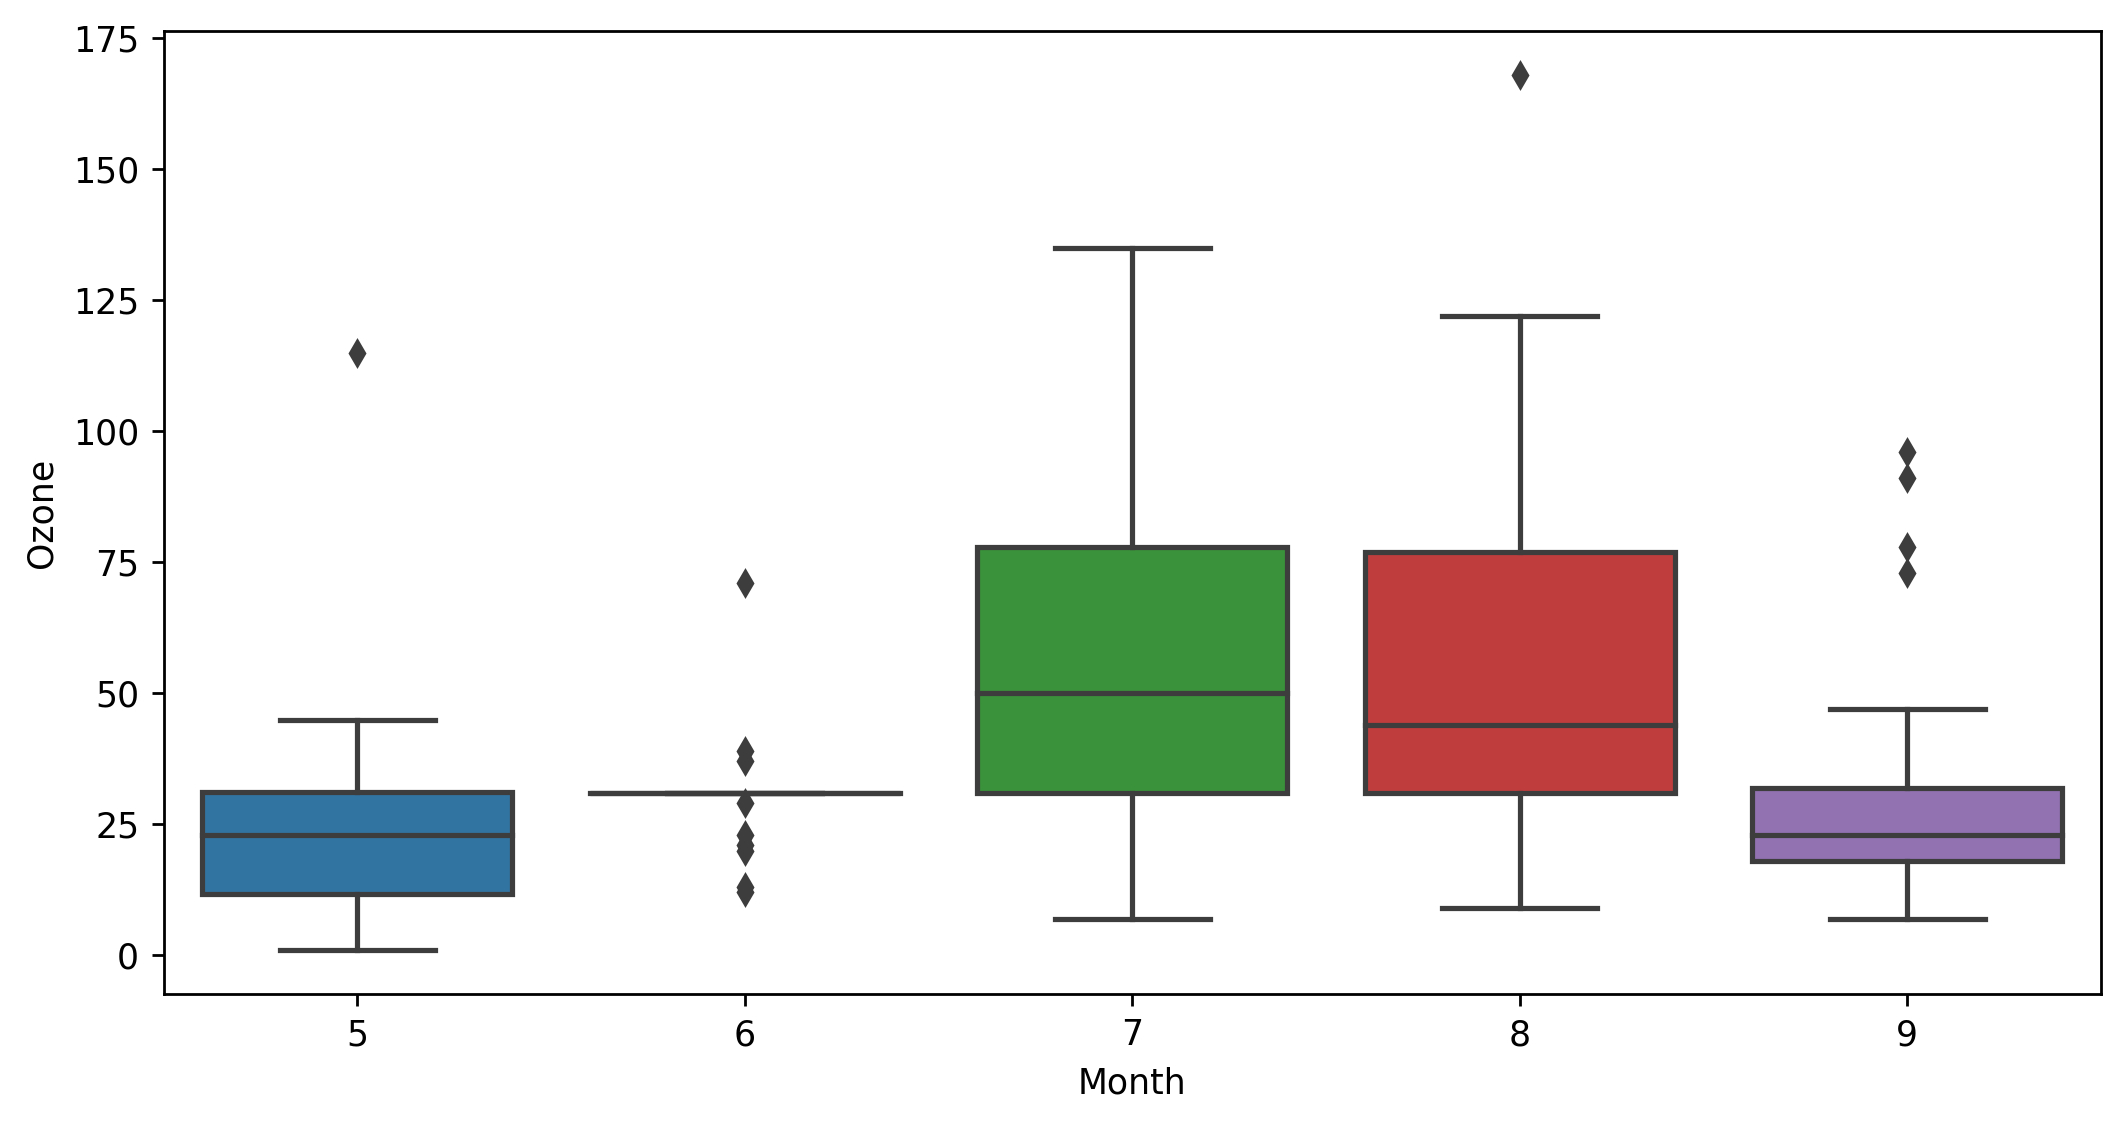

In [74]:
sns.boxplot(df['Month'], df['Ozone'])

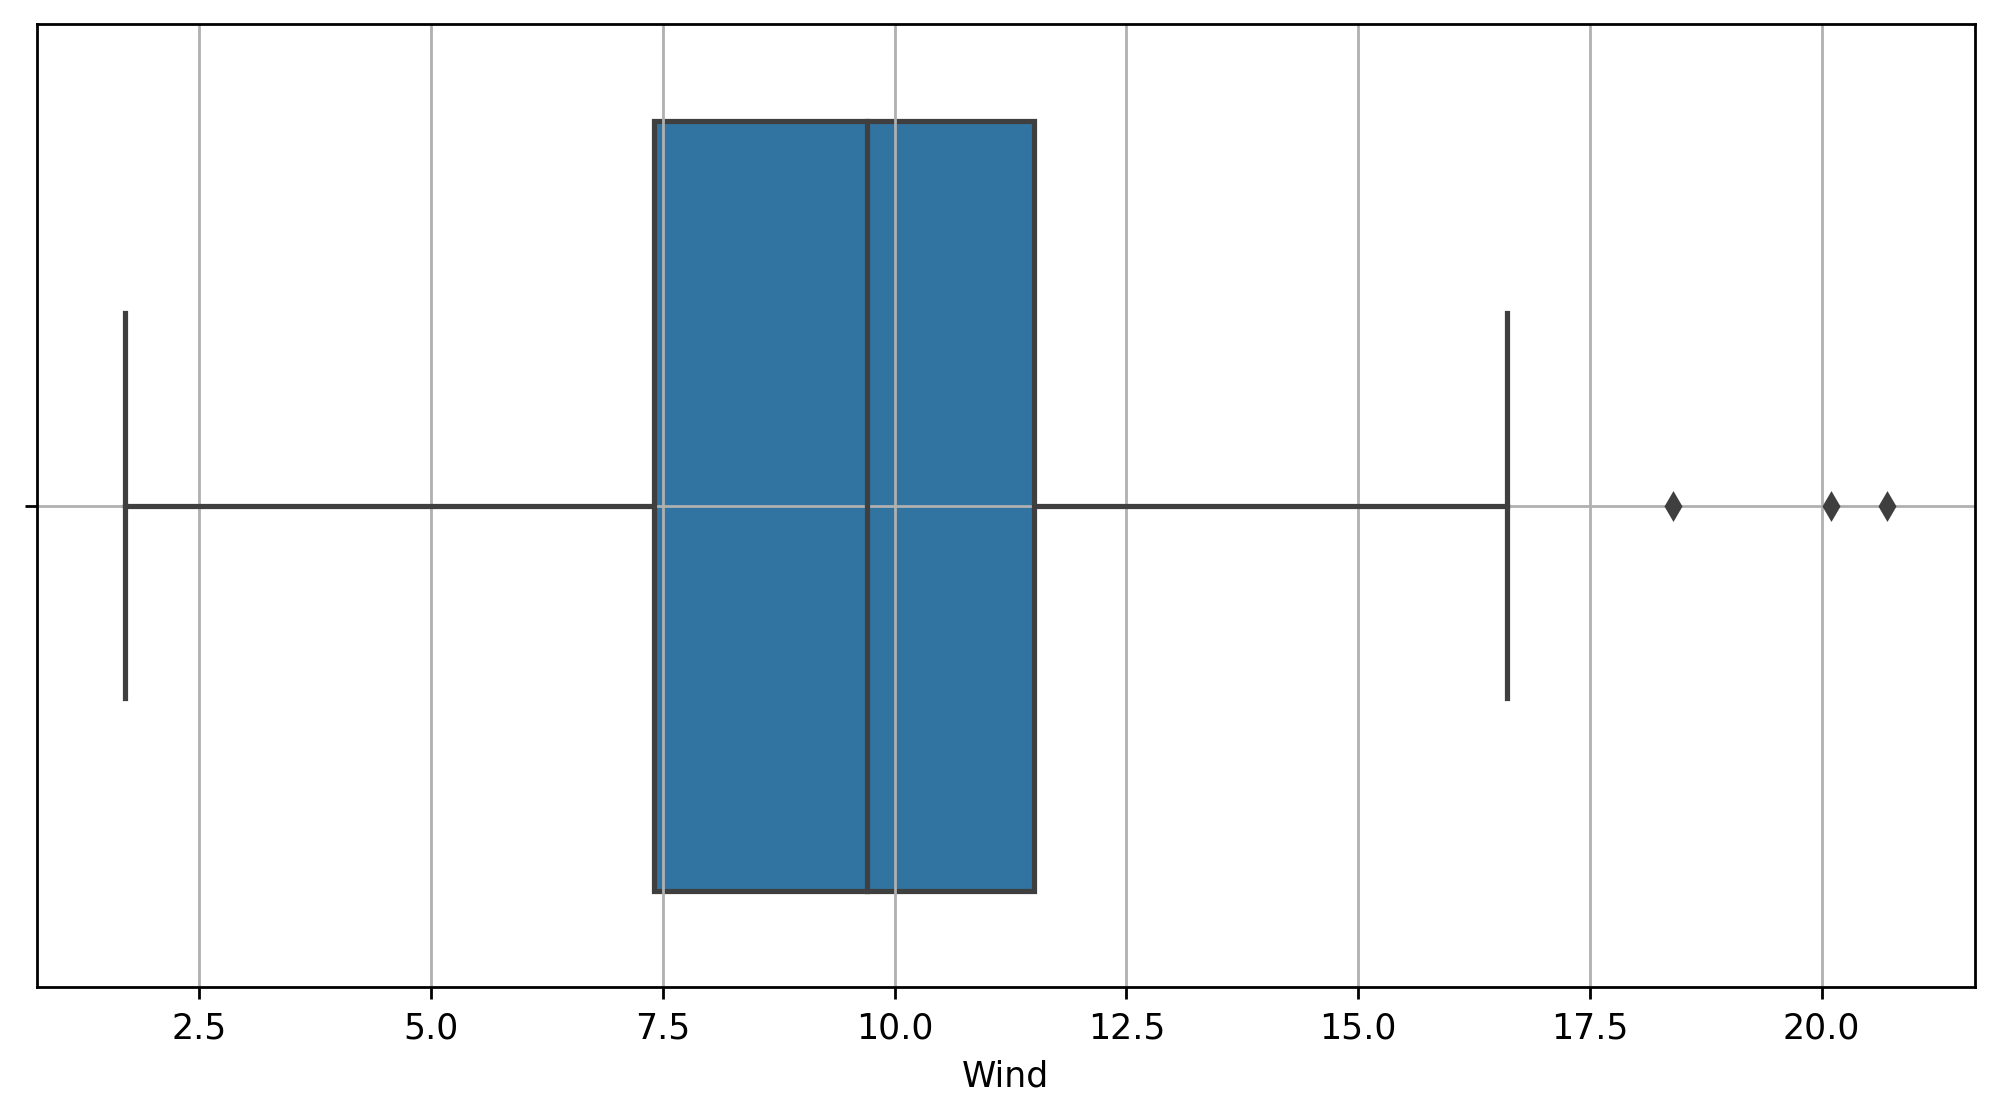

In [76]:
sns.boxplot(df['Wind'])
plt.grid()

In [77]:
df[df['Wind'] > 17.5]

,Ozone,Solar,Wind,Month,Day,Temp,Weather
9,8.0,19.0,20.1,5,9,61,PS
18,6.0,78.0,18.4,5,18,57,C
48,37.0,284.0,20.7,6,17,72,C


In [79]:
df['Wind'].replace(20.1, df['Wind'].median(), inplace=True)

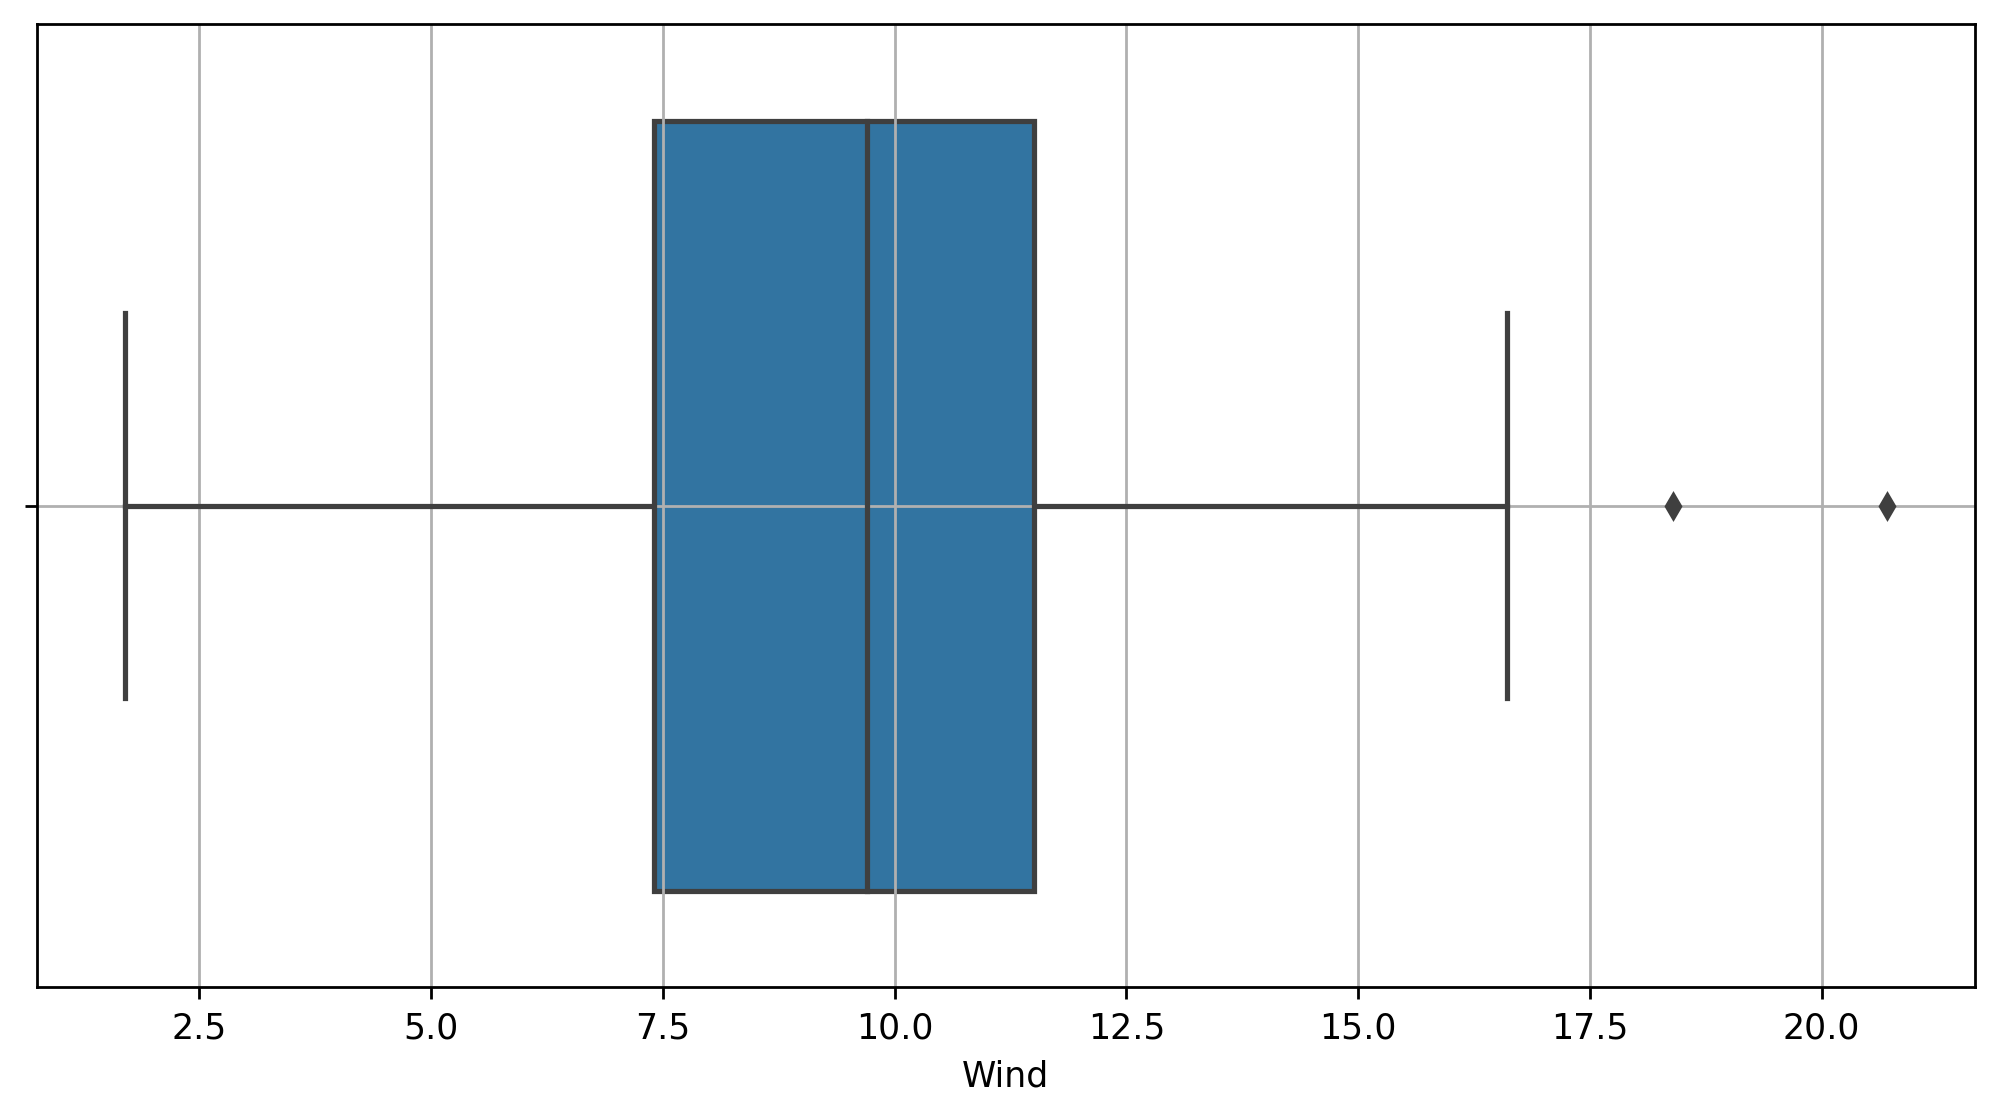

In [80]:
sns.boxplot(df['Wind'])
plt.grid()

In [92]:
df['Wind'].quantile(0.99)

17.391999999999996

# Scatter Plot and Correlation

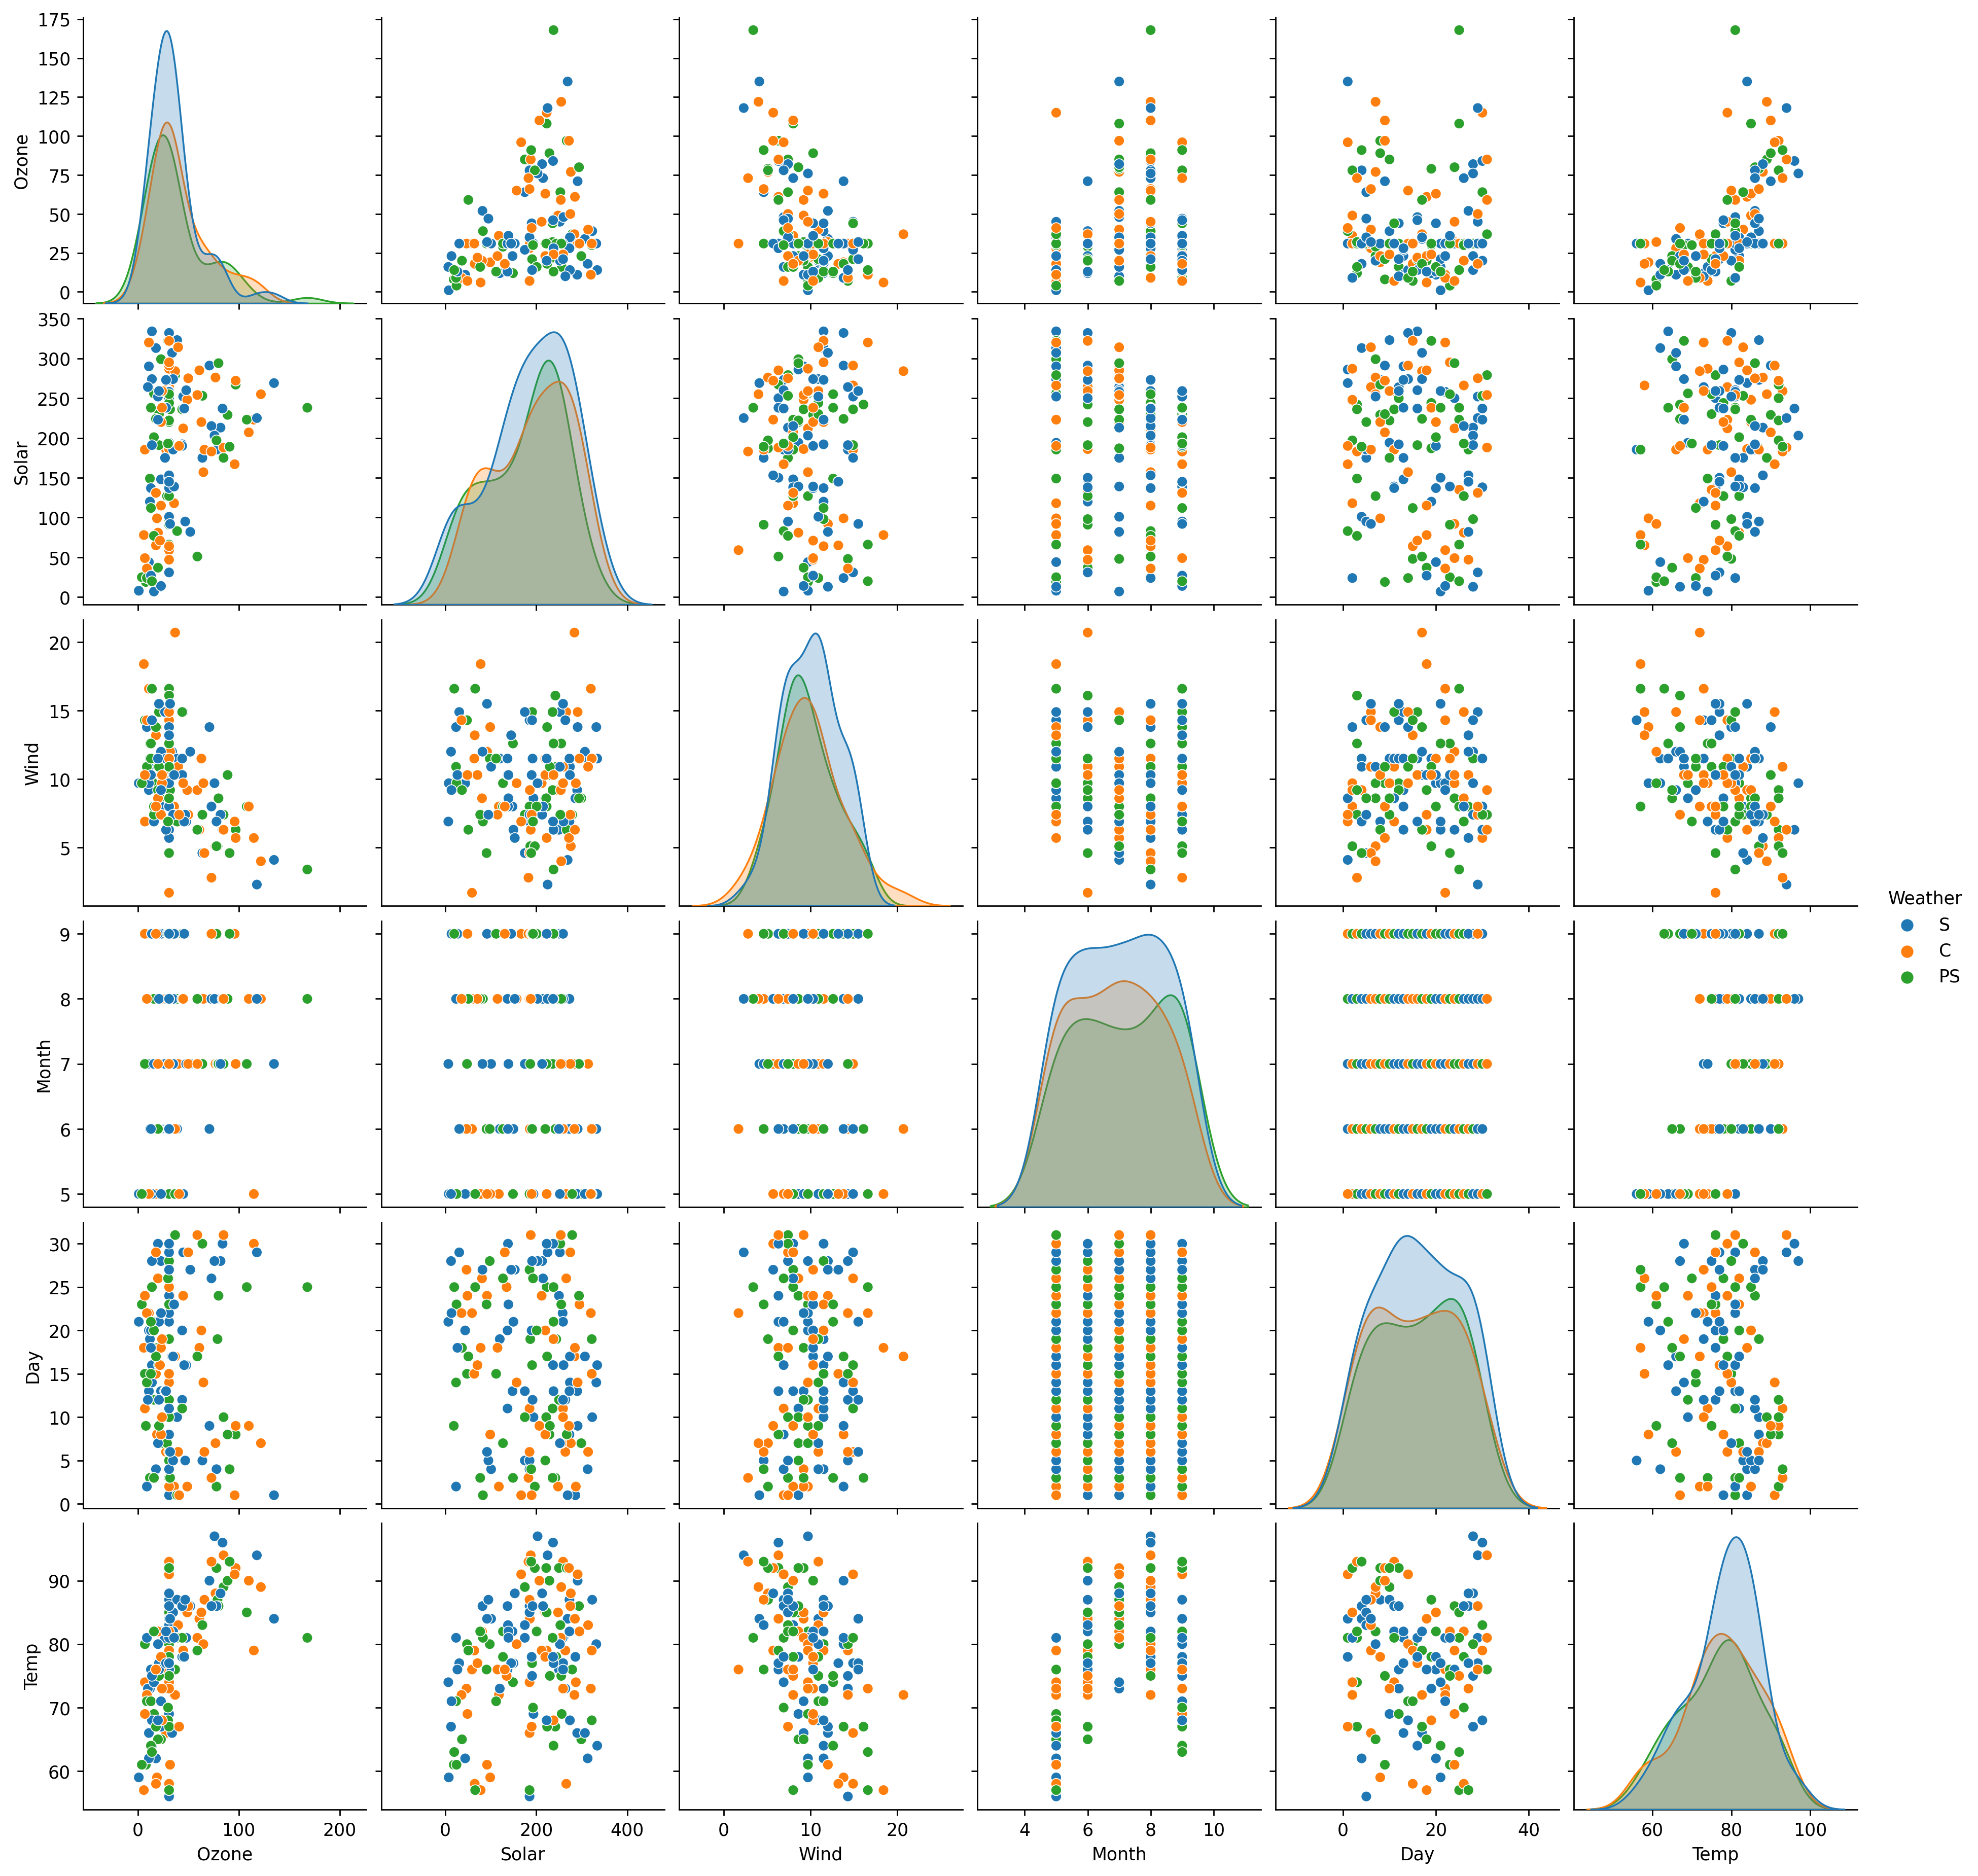

In [83]:
sns.pairplot(df, hue = 'Weather')

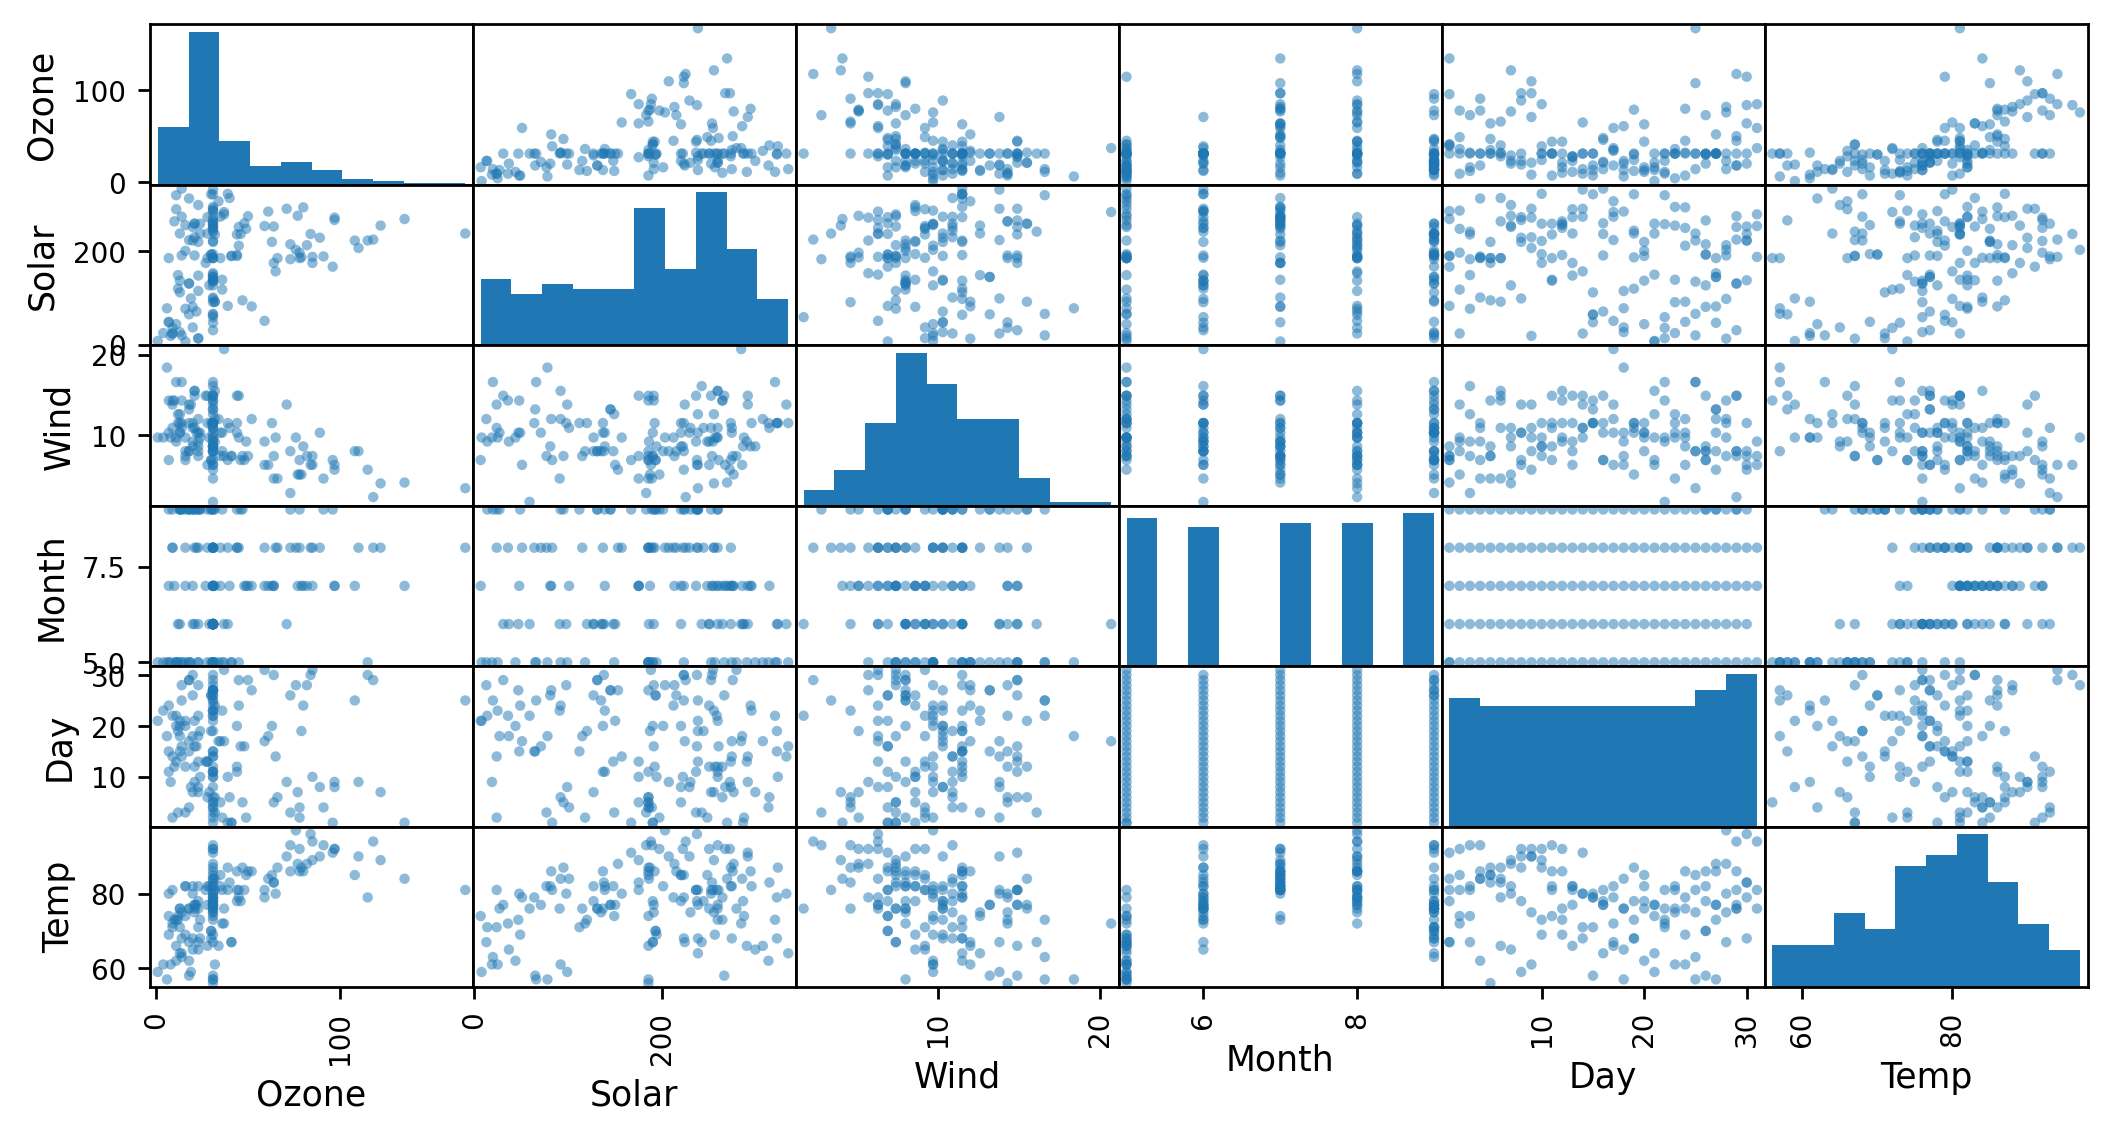

In [85]:
pd.plotting.scatter_matrix(df)
plt.show()

In [ ]:
#Correlation coefficient

In [86]:
df.corr()

,Ozone,Solar,Wind,Month,Day,Temp
Ozone,1.000000,0.297661,-0.517364,0.171488,-0.031737,0.597087
Solar,0.297661,1.000000,-0.020056,-0.080237,-0.151007,0.260677
Wind,-0.517364,-0.020056,1.000000,-0.147618,0.045849,-0.418897
Month,0.171488,-0.080237,-0.147618,1.000000,0.041438,0.408060
Day,-0.031737,-0.151007,0.045849,0.041438,1.000000,-0.122787
Temp,0.597087,0.260677,-0.418897,0.408060,-0.122787,1.000000


<AxesSubplot:>

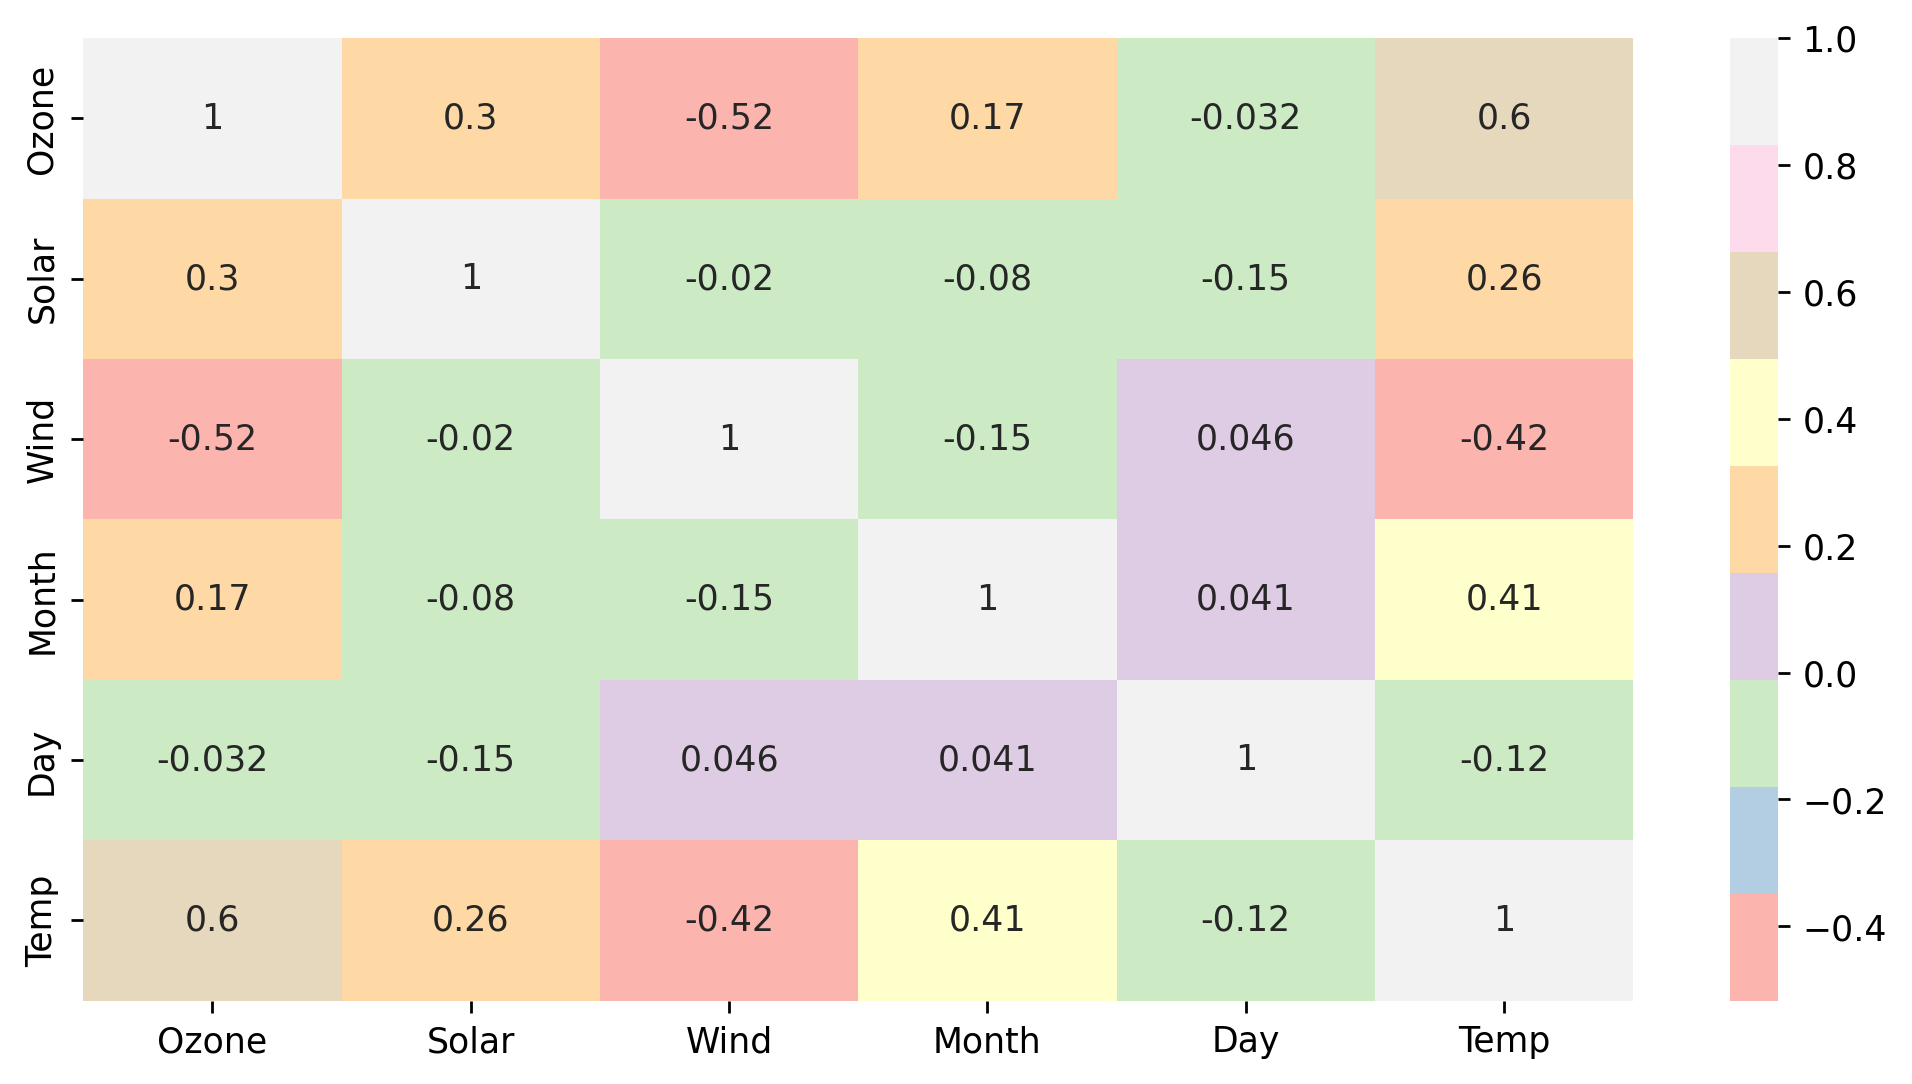

In [91]:
sns.heatmap(df.corr(), annot=True, cmap='Pastel1')

# Transformations

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.

In [ ]:
#Encoding using pandas dummy function.

# **Scaling the data**

- Normalization
    - Scales value within the range of 0 to 1.
- Standardization
    - Uses Z score for scaling.
    - Scale values in such a way that the mean = 0 and standard deviation is 1.

# Speed up the EDA process

In [ ]:
# !pip install pandas-profiling==3.1.0
# !pip install sweetviz

In [ ]:
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
df = pd.read_csv('data_clean.csv', index_col=0)
df

In [ ]:
EDA_report= pp. ProfileReport(df, title="Pandas Profiling Report", vars={"num": {"low_categorical_threshold": 0}})
EDA_report

In [ ]:
EDA_report.to_file(output_file='report2.html')

In [ ]:
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
sweet_report = sv.analyze(df)

In [ ]:
sweet_report

In [ ]:
sweet_report.show_html('weather_report.html')